In [172]:
# Import required libraries for this project.
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
# Load data into pandas dataframes.
TRAIN_DATA_PATH = '../data/train.csv'
TEST_DATA_PATH = '../data/test.csv'
TEST_LABELS_PATH = '../data/test_labels.csv'

df_train = pd.read_csv(TRAIN_DATA_PATH)
df_test = pd.read_csv(TEST_DATA_PATH)
df_test_labels = pd.read_csv(TEST_LABELS_PATH)

In [174]:
# Printing first 5 rows of training data.
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [175]:
# Getting all the ids having label value as -1 and removing them from the test data.
ids_to_remove = (df_test_labels[df_test_labels.toxic == -1]).id
df_test = df_test[~df_test['id'].isin(ids_to_remove)]
df_test_labels = df_test_labels[~df_test_labels['id'].isin(ids_to_remove)]

In [176]:
df_test.head()

,id,comment_text
5,0001ea8717f6de06,Thank you for understanding. I think very high...
7,000247e83dcc1211,:Dear god this site is horrible.
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig..."
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ..."
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l..."


In [177]:
df_test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0


[0 1 2 3 4 5]


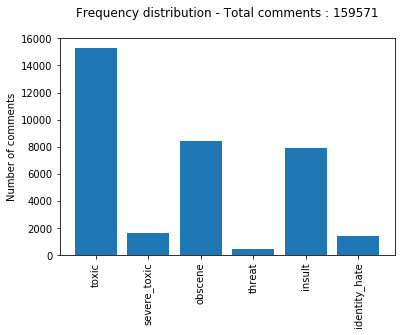

In [183]:
# Plotting a frequency distribution graph.

total = len(df_train)
toxic_count = (df_train.toxic.values == 1).sum()
severe_toxic_count = (df_train.severe_toxic.values == 1).sum()
obscene_count = (df_train.obscene.values == 1).sum()
threat_count = (df_train.threat.values == 1).sum()
insult_count = (df_train.insult.values == 1).sum()
identity_hate_count = (df_train.identity_hate.values == 1).sum()

comment_classes = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')
y_pos = np.arange(len(comment_classes))

plt.title(f'Frequency distribution - Total comments : {total}\n')
plt.ylabel('Number of comments') 

freq = [toxic_count,severe_toxic_count,obscene_count,threat_count,insult_count,identity_hate_count]

plt.bar(y_pos, freq, align='center')
plt.xticks(y_pos, comment_classes, rotation=90)

plt.grid(False)
plt.show()

In [179]:
# Getting info about the number of comments which are toxic and/or belongs to more than one toxicity level.
c1,c2 = 0,0
temp = df_train.loc[:, ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

for tup in temp.itertuples(index=False):
    c = np.count_nonzero(tup)
    if c:
        c1 = c1 + 1
    if c > 1:
        c2 = c2 + 1

print(f'Number of comments which belongs to one of the toxic class : {c1}')
print(f'Number of comments which belongs to more than one toxic classes : {c2}')

Number of comments which belongs to one of the toxic class : 16225
Number of comments which belongs to more than one toxic classes : 9865


Average length of a comment : 394.0732213246768


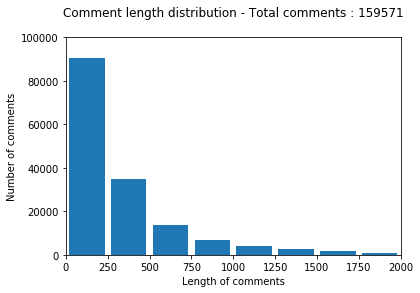

In [189]:
# Plotting a graph of comment length distribution.
comments = df_train['comment_text']

len_arr = [len(comments[i]) for i in range(comments.shape[0])]

avg_len = sum(len_arr) / len(len_arr)
print(f'Average length of a comment : {avg_len}')

bins = [1,250,500,750,1000,1250,1500,1750,2000]
plt.hist(x, bins=bins, rwidth=0.85)

plt.title(f'Comment length distribution - Total comments : {total}\n')
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')

plt.axis([0, 2000, 0, 100000])

plt.grid(False)
plt.show()